In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("BankNote_Authentication.csv")

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


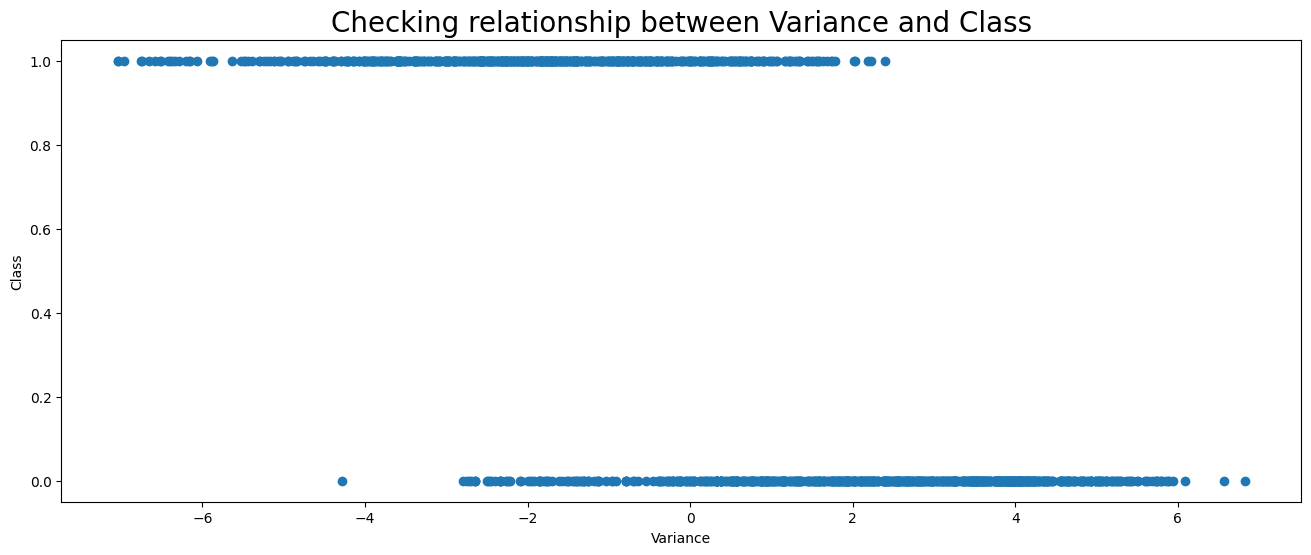

In [4]:
plt.figure(figsize=(16,6))
plt.title('Checking relationship between Variance and Class',fontsize=20)
plt.xlabel('Variance')
plt.ylabel('Class')
plt.scatter(x=data['variance'],y=data['class'])
plt.show()

#### As most of the values with variance less than -3 gives class as 1 and variance greater than 2 gives value as 0, we would remove the values which has variance -3 and class 0

#### Similarly we would remove the values with variance 2 and class 1

In [5]:
data1 = data.loc[(data['variance'] < -3) & (data['class']==0)].index
data2 = data.loc[(data['variance'] > 2 ) & (data['class']==1)].index

In [6]:
data = data.drop(data1)
data = data.drop(data2)

In [7]:
x = data.drop(['class'], axis=1)
y = data['class']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)


RandomForestClassifier()

In [11]:
y_pred=classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [13]:
score

0.9951219512195122

In [14]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [15]:
classifier.predict([[2,3,4,1]])

/Users/abhinavreddy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])